**Setup**

In [53]:
! pip -q install rdkit-pypi

In [ ]:
! pip install python-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip -q install Pillow

Important packages

In [ ]:
from rdkit import Chem, RDLogger
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os
from os import listdir
from rdkit.Chem import Draw
import pandas as pd
import numpy as np
RDLogger.DisableLog("rdApp.*")
from google.colab import drive
%matplotlib inline

Upload csv file with create diractory  

In [ ]:
#os.mkdir('tempDir') # to create diractory 

In [ ]:
dirName = 'tempDir'

In [ ]:
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory  tempDir  Created 


In [ ]:
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")

Directory  tempDir  already exists


In [ ]:
tempDir ='/content/drive/MyDrive/QM9(FILTERED).csv'     #"https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/qm9.csv" link of data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Convert all SMILES column to  chemical structure as images

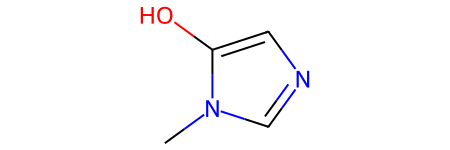

In [ ]:
data = []
with open(tempDir, "r") as f:
    for line in f.readlines()[1:]:
        data.append(line.split(",")[1])


smiles = data[1000]
molecule = Chem.MolFromSmiles(smiles)
molecule

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import pandas as pd
# read the csv file into a pandas dataframe
df = pd.read_csv('QM9(FILTERED).csv')

In [ ]:
# check the data types of the columns in the dataframe
print(df.dtypes)

mol_id        object
smiles        object
A            float64
B            float64
C            float64
mu           float64
alpha        float64
homo         float64
lumo         float64
gap          float64
r2           float64
zpve         float64
u0           float64
u298         float64
h298         float64
g298         float64
cv           float64
u0_atom      float64
u298_atom    float64
h298_atom    float64
g298_atom    float64
dtype: object


In [ ]:
# convert the column 'smiles' to string type
df['smiles'] = df['smiles'].astype(str)

In [ ]:
# replace the character 'f' with 'Cl' or 'Br' in column 'smiles'
df['smiles'] = df['smiles'].str.replace('f', 'Cl')

In [ ]:
print (df)

        mol_id         smiles          A           B           C      mu  \
0        gdb_1              C  157.71180  157.709970  157.706990  0.0000   
1        gdb_2              N  293.60975  293.541110  191.393970  1.6256   
2        gdb_3              O  799.58812  437.903860  282.945450  1.8511   
3        gdb_4            C#C    0.00000   35.610036   35.610036  0.0000   
4        gdb_5            C#N    0.00000   44.593883   44.593883  2.8937   
...        ...            ...        ...         ...         ...     ...   
5414  gdb_5415   c1cnc(cn1)CO    5.14630    1.585070    1.221040  1.8841   
5415  gdb_5416     c1cncnc1CO    5.32252    1.550850    1.209980  2.7840   
5416  gdb_5417   c1ncnc(n1)CO    5.53177    1.594860    1.247520  1.9165   
5417  gdb_5418  N=C1NC=CN1C=O    3.68325    2.034720    1.310670  5.1969   
5418  gdb_5419  N=C1OC=CN1C=O    3.82655    2.012440    1.318840  3.0952   

      alpha    homo    lumo     gap  ...          u0        u298        h298  \
0     1

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# save the updated dataframe back to the csv file
df.to_csv('qm9.csv', index=False)

In [ ]:
def delete_aromatic_bonds(smiles):
    # convert the SMILES string to a RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)

    # get a list of aromatic bonds in the molecule
    aromatic_bonds = [bond for bond in mol.GetBonds() if bond.GetBondType() == Chem.BondType.AROMATIC]

    # replace each aromatic bond in the molecule with a single bond
    for bond in aromatic_bonds:
        begin_atom_idx = bond.GetBeginAtomIdx()
        end_atom_idx = bond.GetEndAtomIdx()
        mol.ReplaceBond(begin_atom_idx, end_atom_idx, Chem.BondType.SINGLE)

    # convert the molecule back to a SMILES string
    smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
    return smiles


In [ ]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

def calculate_mw(smiles):
    mol = MolFromSmiles(smiles)
    mw = Descriptors.ExactMolWt(mol)
    return mw

df['mw'] = df['smiles'].apply(calculate_mw)
# filter the dataframe to only include rows where the molecular weight is between 0 and 100
df = df[(df['mw'] >= 0) & (df['mw'] <= 100)]
# save the filtered dataframe to a new csv file
df.to_csv('qm9.csv', index=False)

In [ ]:
atom_mapping = {
 "C": 1,
    1: "C",
    "N": 2,
    2: "N",
    "O": 3,
    3: "O",  
   "F": 4,
    4: "F",
    "Br" : 4,
    4:"Br"
   

} 
#detrmine bounds types
for x in smiles:
 bond_mapping = {
    "SINGLE": 0,
    0: Chem.BondType.SINGLE,
    "DOUBLE": 1,
    1: Chem.BondType.DOUBLE,
    "TRIPLE": 2,
    2: Chem.BondType.TRIPLE,
    "AROMATIC": 3,
    3: Chem.BondType.AROMATIC,
    
 } 
#Exclude chemical bonds
exclude_bonds ={
     "Br-Br": 1,
    1: "Br-Br",
    "Cl-Cl": 2,
    2: "Cl-Cl",
    "N-Cl": 3,
    3: "N-Cl",  
    "N-Br": 4,
    4: "N-Br",
    "Br-C" : 5,
    5:"Br-Cl",
     "O-Cl": 6,
    6: "O-Cl",
    "O-Br" : 7,
    7:"O-Br",
    
}


NUM_ATOMS = 9 #max number of atoms  when generate based in data QM9     
ATOM_DIM = 4+1 # Number of atom types + H
BOND_DIM = 4  # Number of bond types
LATENT_DIM = 64  #latent space


In [ ]:
data = []
with open(tempDir, "r") as f:
    for line in f.readlines()[1:]:
        data.append(line.split(",")[1])


smiles = data[1000]
if smiles in exclude_bonds and smiles!= atom_mapping: 
  del(smiles)
else:
 molecule = Chem.MolFromSmiles(smiles)
 molecule 

In [ ]:
def smiles_to_graph(smiles):
                                                 
   # Converts SMILES to molecule object
    molecule = Chem.MolFromSmiles(smiles)

    adjacency = np.zeros((BOND_DIM, NUM_ATOMS,NUM_ATOMS), "float32")  #  create molecule
    features = np.zeros((NUM_ATOMS, ATOM_DIM), "float32")  #atom 

    # loop over each atom in molecule
    for atom in molecule.GetAtoms():
        i = atom.GetIdx()
        atom_type = atom_mapping[atom.GetSymbol()]
        features[i] = np.eye(ATOM_DIM)[atom_type]
        # loop for  neighbors
        for neighbor in atom.GetNeighbors():
            j = neighbor.GetIdx()
            bond = molecule.GetBondBetweenAtoms(i, j)
            bond_type_idx = bond_mapping[bond.GetBondType().name]
            adjacency[bond_type_idx, [i, j], [j, i]] = 1
            # Where no bond, add 1 to last channel    
    adjacency[-1, np.sum(adjacency, axis=0) == 0] = 1

    # Where no atom, add 1 to last column (indicating "non-atom")
    features[np.where(np.sum(features, axis=1) == 0)[0], -1] = 1

    return adjacency, features   

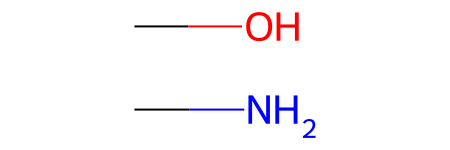

In [ ]:
def graph_to_molecule(graph):
    # Unpack graph
    adjacency, features = graph

    # RWMol is a molecule object intended to be edited
    molecule = Chem.RWMol()

    # Remove "no atoms" & atoms with no bonds
    keep_idx = np.where(
        (np.argmax(features, axis=1) != ATOM_DIM - 1)
        & (np.sum(adjacency[:-1], axis=(0, 1)) != 0)
    )[0]
    features = features[keep_idx]
    adjacency = adjacency[:, keep_idx, :][:, :, keep_idx]

    # Add atoms to molecule
    for atom_type_idx in np.argmax(features, axis=1):
        atom = Chem.Atom(atom_mapping[atom_type_idx])
        _ = molecule.AddAtom(atom)

    # Add bonds between atoms in molecule; based on the upper triangles
    # of the [symmetric] adjacency tensor
    (bonds_ij, atoms_i, atoms_j) = np.where(np.triu(adjacency) == 1)
    for (bond_ij, atom_i, atom_j) in zip(bonds_ij, atoms_i, atoms_j):
        if atom_i == atom_j or bond_ij == BOND_DIM - 1:
            continue
        bond_type = bond_mapping[bond_ij]
        molecule.AddBond(int(atom_i), int(atom_j), bond_type)

    # Sanitize the molecule; for more information on sanitization, see
    # https://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization
    flag = Chem.SanitizeMol(molecule, catchErrors=True)
    # Let's be strict. If sanitization fails, return None
    if flag != Chem.SanitizeFlags.SANITIZE_NONE:
        return None

    return molecule

   

 # Test helper functions
graph_to_molecule(smiles_to_graph(smiles))     

Generate training set

In [ ]:
adjacency_tensor, feature_tensor = [], []
for smiles in data[::4]:
   adjacency, features = smiles_to_graph(smiles)
   adjacency_tensor.append(adjacency)
   feature_tensor.append(features)

adjacency_tensor = np.array(adjacency_tensor)
feature_tensor = np.array(feature_tensor)

print("adjacency_tensor.shape",adjacency_tensor.shape)
print("feature_tensor.shape",feature_tensor.shape)

adjacency_tensor.shape (1355, 4, 9, 9)
feature_tensor.shape (1355, 9, 5)


Generator 

In [ ]:
def Generator(
    dense_units, dropout_rate, latent_dim, adjacency_shape, feature_shape,
):
    z = keras.layers.Input(shape=(LATENT_DIM,))
    # Propagate through one or more densely connected layers
    x = z
    for units in dense_units:
        x = keras.layers.Dense(units, activation="tanh")(x)
        x = keras.layers.Dropout(dropout_rate)(x)

    # Map outputs of previous layer (x) to [continuous] adjacency tensors (x_adjacency)
    x_adjacency = keras.layers.Dense(tf.math.reduce_prod(adjacency_shape))(x)
    x_adjacency = keras.layers.Reshape(adjacency_shape)(x_adjacency)
    # Symmetrify tensors in the last two dimensions
    x_adjacency = (x_adjacency + tf.transpose(x_adjacency, (0, 1, 3, 2))) / 2
    x_adjacency = keras.layers.Softmax(axis=1)(x_adjacency)

    # Map outputs of previous layer (x) to [continuous] feature tensors (x_features)
    x_features = keras.layers.Dense(tf.math.reduce_prod(feature_shape))(x)
    x_features = keras.layers.Reshape(feature_shape)(x_features)
    x_features = keras.layers.Softmax(axis=2)(x_features)

    return keras.Model(inputs=z, outputs=[x_adjacency, x_features], name="Generator")
generator = Generator(
dense_units=[128, 256, 512],
dropout_rate=0.2,
latent_dim=LATENT_DIM,
adjacency_shape=(BOND_DIM, NUM_ATOMS, NUM_ATOMS),
feature_shape=(NUM_ATOMS, ATOM_DIM),
)
generator.summary()

Model: "Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          8320        ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 256)          33024       ['dropout[0][0]']                
                                                                                          

Discriminator

In [ ]:
class RelationalGraphConvLayer(keras.layers.Layer):
    def __init__(
        self,
        units=128,
        activation="relu",
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        **kwargs
    ):
        super().__init__(**kwargs)

        self.units = units
        self.activation = keras.activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = keras.initializers.get(kernel_initializer)
        self.bias_initializer = keras.initializers.get(bias_initializer)
        self.kernel_regularizer = keras.regularizers.get(kernel_regularizer)
        self.bias_regularizer = keras.regularizers.get(bias_regularizer)

    def build(self, input_shape):
        bond_dim = input_shape[0][1]
        atom_dim = input_shape[1][2]

        self.kernel = self.add_weight(
            shape=(bond_dim, atom_dim, self.units),
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            trainable=True,
            name="W",
            dtype=tf.float32,
        )
        if self.use_bias:
            self.bias = self.add_weight(
                shape=(bond_dim, 1, self.units),
                initializer=self.bias_initializer,
                regularizer=self.bias_regularizer,
                trainable=True,
                name="b",
                dtype=tf.float32,
            )

        self.built = True
        
    def call(self, inputs, training=False):
        adjacency, features = inputs
        # Aggregate information from neighbors
        x = tf.matmul(adjacency, features[:, None, :, :])
        # Apply linear transformation
        x = tf.matmul(x, self.kernel)
        if self.use_bias:
            x += self.bias
        # Reduce bond types dim
        x_reduced = tf.reduce_sum(x, axis=1)
        # Apply non-linear transformation
        return self.activation(x_reduced)
def Discriminator(
    gconv_units, dense_units, dropout_rate, adjacency_shape, feature_shape
):

    adjacency = keras.layers.Input(shape=adjacency_shape)
    features = keras.layers.Input(shape=feature_shape)

    # Propagate through one or more graph convolutional layers
    features_transformed = features
    for units in gconv_units:
        features_transformed = RelationalGraphConvLayer(units)(
            [adjacency, features_transformed]
        )

    # Reduce 2-D representation of molecule to 1-D
    x = keras.layers.GlobalAveragePooling1D()(features_transformed)

    # Propagate through one or more densely connected layers
    for units in dense_units:
        x = keras.layers.Dense(units, activation="relu")(x)
        x = keras.layers.Dropout(dropout_rate)(x)

    # For each molecule, output a single scalar value expressing the
    # "realness" of the inputted molecule
    x_out = keras.layers.Dense(1, dtype="float32")(x)

    return keras.Model(inputs=[adjacency, features], outputs=x_out)


discriminator = Discriminator(
    gconv_units=[128, 128, 128, 128],
    dense_units=[512, 512],
    dropout_rate=0.2,
    adjacency_shape=(BOND_DIM, NUM_ATOMS, NUM_ATOMS),
    feature_shape=(NUM_ATOMS, ATOM_DIM),
)
discriminator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 4, 9, 9)]    0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 9, 5)]       0           []                               
                                                                                                  
 relational_graph_conv_layer (R  (None, 9, 128)      2560        ['input_2[0][0]',                
 elationalGraphConvLayer)                                         'input_3[0][0]']                
                                                                                                  
 relational_graph_conv_layer_1   (None, 9, 128)      65536       ['input_2[0][0]',            

WGAN

In [ ]:
class GraphWGAN(keras.Model):
    def __init__(
        self,
        generator,
        discriminator,
        discriminator_steps=1,
        generator_steps=1,
        gp_weight=10,
        **kwargs
    ):
        super().__init__(**kwargs)
        self.generator = generator
        self.discriminator = discriminator
        self.discriminator_steps = discriminator_steps
        self.generator_steps = generator_steps
        self.gp_weight = gp_weight
        self.latent_dim = self.generator.input_shape[-1]

    def compile(self, optimizer_generator, optimizer_discriminator, **kwargs):
        super().compile(**kwargs)
        self.optimizer_generator = optimizer_generator
        self.optimizer_discriminator = optimizer_discriminator
        self.metric_generator = keras.metrics.Mean(name="loss_gen")
        self.metric_discriminator = keras.metrics.Mean(name="loss_dis")

    def train_step(self, inputs):

        if isinstance(inputs[0], tuple):
            inputs = inputs[0]

        graph_real = inputs

        self.batch_size = tf.shape(inputs[0])[0]

        # Train the discriminator for one or more steps
        for _ in range(self.discriminator_steps):
            z = tf.random.normal((self.batch_size, self.latent_dim))

            with tf.GradientTape() as tape:
                graph_generated = self.generator(z, training=True)
                loss = self._loss_discriminator(graph_real, graph_generated)

            grads = tape.gradient(loss, self.discriminator.trainable_weights)
            self.optimizer_discriminator.apply_gradients(
                zip(grads, self.discriminator.trainable_weights)
            )
            self.metric_discriminator.update_state(loss)

        # Train the generator for one or more steps
        for _ in range(self.generator_steps):
            z = tf.random.normal((self.batch_size, self.latent_dim))

            with tf.GradientTape() as tape:
                graph_generated = self.generator(z, training=True)
                loss = self._loss_generator(graph_generated)

                grads = tape.gradient(loss, self.generator.trainable_weights)
                self.optimizer_generator.apply_gradients(
                    zip(grads, self.generator.trainable_weights)
                )
                self.metric_generator.update_state(loss)

        return {m.name: m.result() for m in self.metrics}

    def _loss_discriminator(self, graph_real, graph_generated):
        logits_real = self.discriminator(graph_real, training=True)
        logits_generated = self.discriminator(graph_generated, training=True)
        loss = tf.reduce_mean(logits_generated) - tf.reduce_mean(logits_real)
        loss_gp = self._gradient_penalty(graph_real, graph_generated)
        return loss + loss_gp * self.gp_weight

    def _loss_generator(self, graph_generated):
        logits_generated = self.discriminator(graph_generated, training=True)
        return -tf.reduce_mean(logits_generated)

    def _gradient_penalty(self, graph_real, graph_generated):
        # Unpack graphs
        adjacency_real, features_real = graph_real
        adjacency_generated, features_generated = graph_generated

        # Generate interpolated graphs (adjacency_interp and features_interp)
        alpha = tf.random.uniform([self.batch_size])
        alpha = tf.reshape(alpha, (self.batch_size, 1, 1, 1))
        adjacency_interp = (adjacency_real * alpha) + (1 - alpha) * adjacency_generated
        alpha = tf.reshape(alpha, (self.batch_size, 1, 1))
        features_interp = (features_real * alpha) + (1 - alpha) * features_generated

        # Compute the logits of interpolated graphs
        with tf.GradientTape() as tape:
            tape.watch(adjacency_interp)
            tape.watch(features_interp)
            logits = self.discriminator(
                [adjacency_interp, features_interp], training=True
            )

        # Compute the gradients with respect to the interpolated graphs
        grads = tape.gradient(logits, [adjacency_interp, features_interp])
        # Compute the gradient penalty
        grads_adjacency_penalty = (1 - tf.norm(grads[0], axis=1)) ** 2
        grads_features_penalty = (1 - tf.norm(grads[1], axis=2)) ** 2
        return tf.reduce_mean(
            tf.reduce_mean(grads_adjacency_penalty, axis=(-2, -1))
            + tf.reduce_mean(grads_features_penalty, axis=(-1))
        )

Train the model

In [ ]:
wgan = GraphWGAN(generator, discriminator, discriminator_steps=1)

wgan.compile(
    optimizer_generator=keras.optimizers.Adam(5e-4),
    optimizer_discriminator=keras.optimizers.Adam(5e-4),
)

wgan.fit([adjacency_tensor, feature_tensor], epochs=200, batch_size=16) 


Epoch 1/200
85/85 [==============================] - 10s 20ms/step - loss_gen: -1.1320 - loss_dis: -0.6399
Epoch 2/200
85/85 [==============================] - 2s 19ms/step - loss_gen: -0.8717 - loss_dis: -0.6215
Epoch 3/200
85/85 [==============================] - 2s 20ms/step - loss_gen: -1.1624 - loss_dis: -0.5720
Epoch 4/200
85/85 [==============================] - 3s 31ms/step - loss_gen: -0.0056 - loss_dis: -0.8417
Epoch 5/200
85/85 [==============================] - 2s 27ms/step - loss_gen: -0.8211 - loss_dis: -0.9651
Epoch 6/200
85/85 [==============================] - 2s 20ms/step - loss_gen: -0.3925 - loss_dis: -0.9903
Epoch 7/200
85/85 [==============================] - 2s 19ms/step - loss_gen: -0.7309 - loss_dis: -0.6353
Epoch 8/200
85/85 [==============================] - 2s 19ms/step - loss_gen: -0.3016 - loss_dis: -0.6629
Epoch 9/200
85/85 [==============================] - 2s 19ms/step - loss_gen: -0.8243 - loss_dis: -0.9156
Epoch 10/200
85/85 [=========================

Sample with the generator 

32/32 [==============================] - 0s 1ms/step


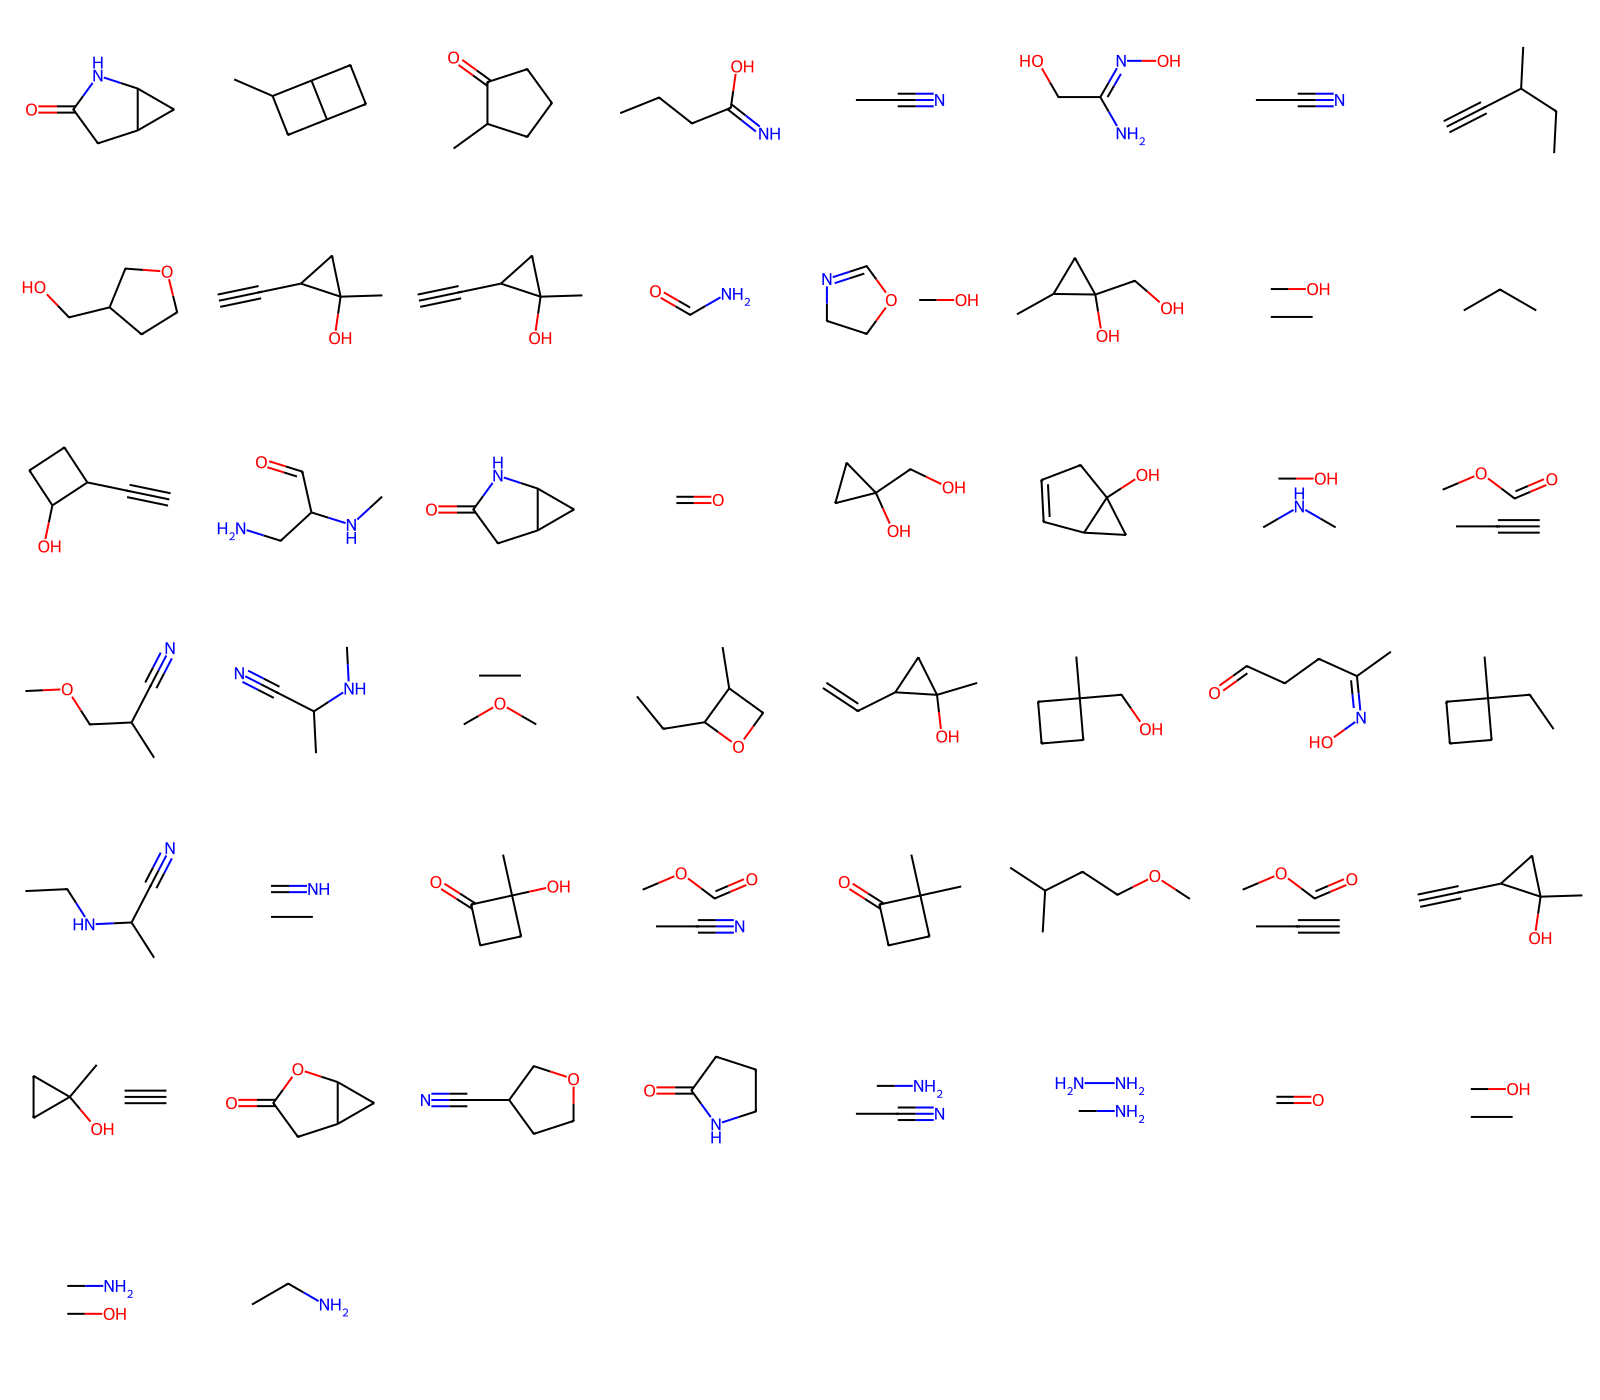

In [ ]:
def sample(generator, batch_size):
    z = tf.random.normal((batch_size, LATENT_DIM))
    graph = generator.predict(z)
    # obtain one-hot encoded adjacency tensor
    adjacency = tf.argmax(graph[0], axis=1)
    adjacency = tf.one_hot(adjacency, depth=BOND_DIM, axis=1)
    # Remove potential self-loops from adjacency
    adjacency = tf.linalg.set_diag(adjacency, tf.zeros(tf.shape(adjacency)[:-1]))
    # obtain one-hot encoded feature tensor
    features = tf.argmax(graph[1], axis=2)
    features = tf.one_hot(features, depth=ATOM_DIM, axis=2)
    return [
        graph_to_molecule([adjacency[i].numpy(), features[i].numpy()])
        for i in range(batch_size)
    ]


molecules = sample(wgan.generator, batch_size=1000)

MolsToGridImage(
    [m for m in molecules if m is not None][:50], molsPerRow=8, subImgSize=(200, 200)
   )

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,12))
axes = axes.flatten()
for i, mol in enumerate(molecules):
    if mol is not None:
        mol = Chem.MolFromSmiles(mol.smiles)
        Draw.MolToImage(mol).save(f'output/mol{i}.png')